In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import scipy as sp

#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf

# Implied Bachelier Vol of the constant BSM vol

In [3]:
texp = 1
fwd = 100
k = np.arange(0.1, 1.5, 0.05)
strike = k*fwd

In [4]:
sigma = 0.2
bsm = pf.Bsm(sigma)  # create a BSM model with vol of sigma
norm = pf.Norm(None)
p = bsm.price(strike, fwd, texp)
ivn0 = bsm.vol_smile(strike, fwd, texp, model='norm', cp=-1)
ivn1 = sigma*np.sqrt(fwd*strike)
ivn2 = sigma*strike
assert np.max( np.fabs(pf.Norm(ivn0).price(strike, fwd, texp) - p) ) < 1e-10

In [5]:
bsm.vol_smile(strike, fwd, texp, model='bsm', cp=-1)

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2])

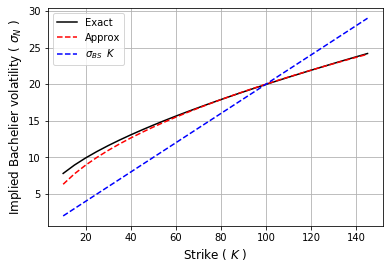

In [6]:
labels = ['Exact', 'Approx', '$\sigma_{BS}\;\; K$']
ls = ['-', '--', '--']
colors = ['k', 'r', 'b']

iv_arr = np.array([ivn0, ivn1, ivn2])

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=12)
plt.ylabel('Implied Bachelier volatility ( $\\sigma_{N}$ )', fontsize=12)
plt.legend()
plt.grid()
#plt.savefig('norm_imp_vol.png', bbox_inches='tight', dpi=150)
plt.show()

# Implied BS Vol of the constant Bachelier vol

In [7]:
sigma = 20
norm = pf.Norm(sigma)
p = norm.price(strike, fwd, texp)

In [8]:
ivbs0 = norm.vol_smile(strike, fwd, texp, cp=-1)
ivbs1 = sigma/np.sqrt(fwd*strike)
ivbs2 = sigma/strike

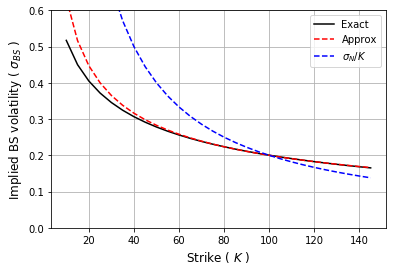

In [9]:
labels = ['Exact', 'Approx', '$\sigma_N / K$']
ls = ['-', '--', '--']
colors = ['k', 'r', 'b']

iv_arr = np.array([ivbs0, ivbs1, ivbs2])

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=12)
plt.ylabel('Implied BS volatility ( $\\sigma_{BS}$ )', fontsize=12)
plt.legend()
plt.grid()
plt.ylim([0, 0.6])
#plt.savefig('bsm_imp_vol.png', bbox_inches='tight', dpi=150)
plt.show()

# Implied BS volatility of DBS models

In [10]:
texp = 1
fwd = 100
k = np.arange(0.3, 2.01, 0.05)
strike = k*fwd

In [11]:
sigma = 0.2
bsm = pf.Bsm(sigma)
norm = pf.Norm(sigma*fwd)
dbs1 = pf.BsmDisp(sigma, beta=1/3, pivot=fwd)
dbs2 = pf.BsmDisp(sigma, beta=2/3, pivot=fwd)
p = norm.price(strike, fwd, texp)

In [12]:
ivbs_0 = norm.vol_smile(strike, fwd, texp, model='bsm')
ivbs_1 = dbs1.vol_smile(strike, fwd, texp, model='bsm')
ivbs_2 = dbs2.vol_smile(strike, fwd, texp, model='bsm')
ivbs = sigma*np.ones_like(strike)

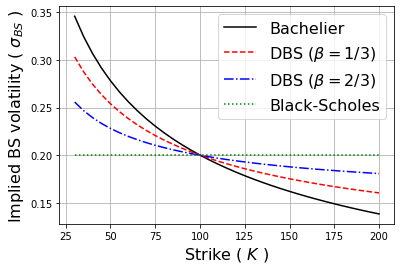

In [13]:
labels = ['Bachelier', 'DBS ($\\beta=1/3$)', 'DBS ($\\beta=2/3$)', 'Black-Scholes']
ls = ['-', '--', '-.', ':']
colors = ['k', 'r', 'b', 'g']

iv_arr = np.array([ivbs_0, ivbs_1, ivbs_2, ivbs])

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=16)
plt.ylabel('Implied BS volatility ( $\\sigma_{BS}$ )', fontsize=16)
plt.legend(fontsize=16)
plt.grid()
#plt.savefig('dbs_bsm_vol.png', bbox_inches='tight', dpi=150)
plt.show()

# SABR model: the impact of parameters

In [14]:
texp = 1
fwd = 100
k = np.arange(0.6, 1.401, 0.02)
strike = k*fwd
sigma = 0.2

In [15]:
sabr = pf.SabrHagan2002(sigma-0.01, vov=0.2, rho=0.1, beta=1)
vol1 = sabr.vol_smile(strike, fwd, texp)

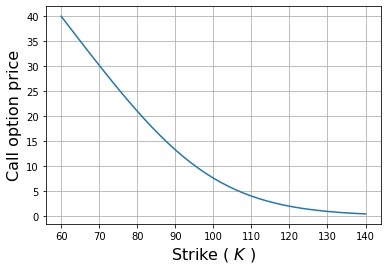

In [16]:
c = sabr.price(strike, fwd, texp)  # use Hagan's formula to compute volatility given K, plug the result into B-S formula and obtain price
plt.plot(strike, c)
plt.xlabel('Strike ( $K$ )', fontsize=16)
plt.ylabel('Call option price', fontsize=16)
plt.grid()

In [17]:
sabr = pf.SabrHagan2002(sigma, vov=0.2, rho=0.1, beta=1)
vol2 = sabr.vol_smile(strike, fwd, texp)

sabr = pf.SabrHagan2002(sigma+0.01, vov=0.2, rho=0.1, beta=1)
vol3 = sabr.vol_smile(strike, fwd, texp)

iv_arr = np.array([vol1, vol2, vol3])

In [18]:
# investigate the effect of sigma
sigma_all = sigma + np.array([-0.01, 0, 0.01])[:, None]
print(sigma_all)
sabr = pf.SabrHagan2002(sigma_all, vov=0.2, rho=0.1, beta=1)
iv_arr = sabr.vol_smile(strike, fwd, texp)

[[0.19]
 [0.2 ]
 [0.21]]


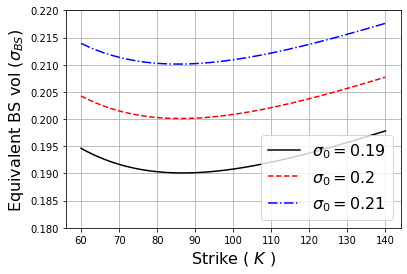

In [19]:
labels = ['$\\sigma_0=0.19$', '$\\sigma_0=0.2$', '$\\sigma_0=0.21$']
ls = ['-', '--', '-.']
colors = ['k', 'r', 'b']

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=16)
plt.ylabel('Equivalent BS vol ($\\sigma_{BS}$)', fontsize=16)
plt.legend(fontsize=16)
plt.ylim([0.18, 0.22])
plt.grid()
#plt.savefig('SABR-sigma.png', bbox_inches='tight', dpi=150)
plt.show()

In [20]:
# investigate the effect of rho
rho_all = np.array([-0.1, 0.1, 0.3])[:, None]
sabr = pf.SabrHagan2002(sigma, vov=0.2, rho=rho_all, beta=1)
iv_arr = sabr.vol_smile(strike, fwd, texp)

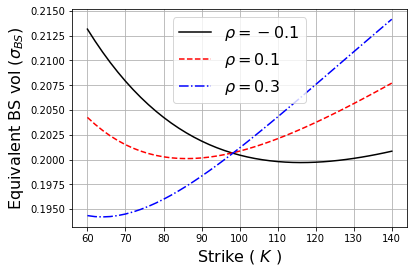

In [21]:
labels = ['$\\rho=-0.1$', '$\\rho=0.1$', '$\\rho=0.3$']
ls = ['-', '--', '-.']
colors = ['k', 'r', 'b']

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=16)
plt.ylabel('Equivalent BS vol ($\\sigma_{BS}$)', fontsize=16)
plt.legend(fontsize=16)
#plt.ylim([19, 22.5])
plt.grid()
#plt.savefig('SABR-rho.png', bbox_inches='tight', dpi=150)
plt.show()

In [22]:
# investigate the effect of vov
vov_all = np.array([0.1, 0.2, 0.3])[:, None]
sabr = pf.SabrHagan2002(sigma, vov=vov_all, rho=0.1, beta=1)
iv_arr = sabr.vol_smile(strike, fwd, texp)

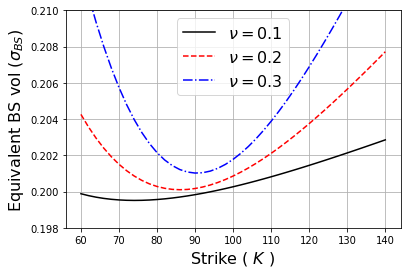

In [23]:
labels = ['$\\nu=0.1$', '$\\nu=0.2$', '$\\nu=0.3$']
ls = ['-', '--', '-.']
colors = ['k', 'r', 'b']

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=16)
plt.ylabel('Equivalent BS vol ($\\sigma_{BS}$)', fontsize=16)
plt.legend(fontsize=16)
plt.ylim([0.198, 0.21])
plt.grid()
#plt.savefig('SABR-vov.png', bbox_inches='tight', dpi=150)
plt.show()

In [24]:
# investigate the effect of beta
sabr = pf.SabrHagan2002(sigma*np.power(fwd,0.4), vov=0.2, rho=0.1, beta=0.6)
vol1 = sabr.vol_smile(strike, fwd, texp)

sabr = pf.SabrHagan2002(sigma*np.power(fwd,0.2), vov=0.2, rho=0.1, beta=0.8)
vol2 = sabr.vol_smile(strike, fwd, texp)

sabr = pf.SabrHagan2002(sigma, vov=0.2, rho=0.1, beta=1)
vol3 = sabr.vol_smile(strike, fwd, texp)

iv_arr = np.array([vol1, vol2, vol3])

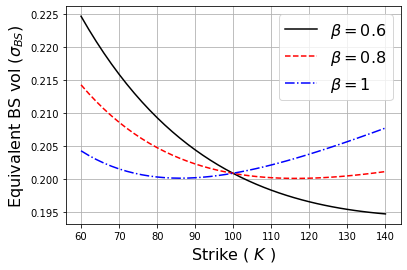

In [25]:
labels = ['$\\beta=0.6$', '$\\beta=0.8$', '$\\beta=1$']
ls = ['-', '--', '-.']
colors = ['k', 'r', 'b']

for j in np.arange(len(iv_arr)):
    plt.plot(strike, iv_arr[j], color=colors[j], linestyle=ls[j], label=labels[j])

plt.xlabel('Strike ( $K$ )', fontsize=16)
plt.ylabel('Equivalent BS vol ($\\sigma_{BS}$)', fontsize=16)
plt.legend(fontsize=16)
#plt.ylim([0.198, 0.21])
plt.grid()
#plt.savefig('SABR-beta.png', bbox_inches='tight', dpi=150)
plt.show()